In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
df=pd.read_csv('/media/thilan/Coding/DL workshop/Day 03/cardio_dataset.csv')

In [6]:
df

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_01,RISK
0,1,48,236,66,0,1,0,1.1
1,0,48,260,51,0,1,1,7.0
2,0,44,187,49,1,1,0,7.0
3,1,42,216,57,1,1,0,0.4
4,1,56,156,42,0,1,0,2.2
...,...,...,...,...,...,...,...,...
6639,1,65,307,42,1,0,1,36.6
6640,1,42,169,56,0,0,0,0.8
6641,0,65,212,35,1,0,0,30.6
6642,0,66,184,39,0,0,0,23.8


In [7]:
df=df.values

In [8]:
data = df[:,0:7]
target=df[:,7]

In [9]:
from sklearn.preprocessing import MinMaxScaler

target=np.reshape(target, (-1,1))

scaler_data = MinMaxScaler()
scaler_target = MinMaxScaler()

scaler_data.fit(data)
scaler_target.fit(target)

data_scaled=scaler_data.transform(data)
target_scaled=scaler_target.transform(target)

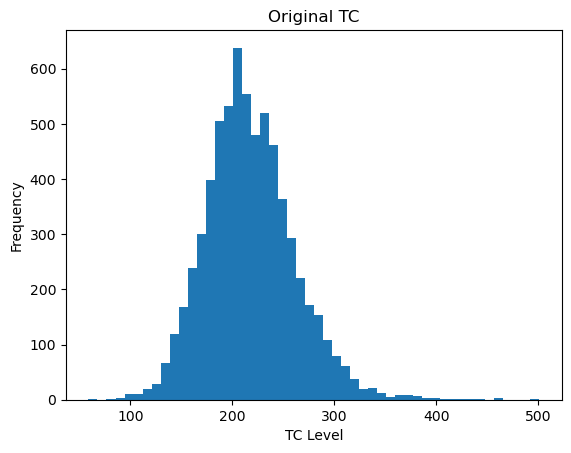

In [10]:
plt.hist(data[:,2],bins=50)
plt.title('Original TC')
plt.xlabel('TC Level')
plt.ylabel('Frequency')
plt.show()

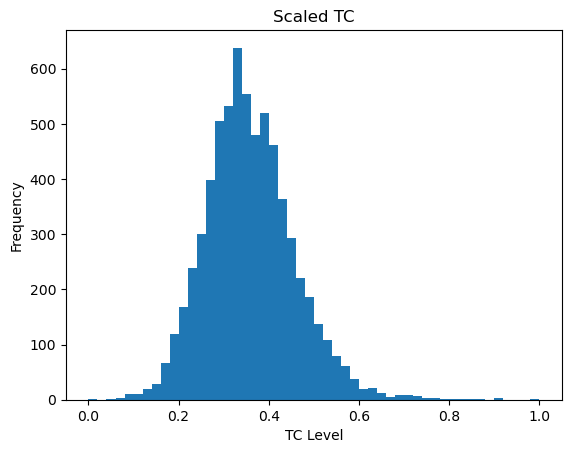

In [11]:
plt.hist(data_scaled[:,2],bins=50)
plt.title('Scaled TC')
plt.xlabel('TC Level')
plt.ylabel('Frequency')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data_scaled,target_scaled,test_size=0.2)

In [13]:
import keras.models as models
import keras.layers as layers
import keras.optimizers as optimizers
from keras.layers import Dropout

model=models.Sequential()
model.add(layers.Dense(128,input_dim=7,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1,activation='linear'))

model.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])

model.summary()

2023-07-26 16:02:14.872848: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-26 16:02:20.407769: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,941
Trainable params: 9,941
Non-trainable params: 0
_________________________________________________________________


In [14]:
history=model.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test))

Epoch 1/200
167/167 [==============================] - 2s 10ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0456 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0407
Epoch 2/200
167/167 [==============================] - 1s 6ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0384 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0382
Epoch 3/200
167/167 [==============================] - 1s 8ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0377 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0417
Epoch 4/200
167/167 [==============================] - 1s 9ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0355 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0355
Epoch 5/200
167/167 [==============================] - 1s 7ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0349 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0362
Epoch 6/200
167/167 [==============================] - 1s 7ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0350 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0365
Epoch 7/2

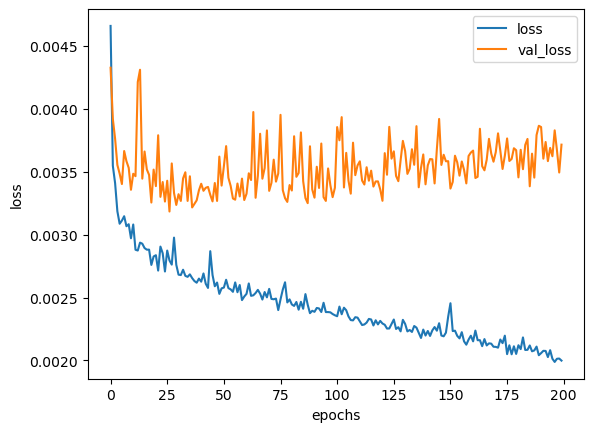

In [15]:
plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['val_loss'],label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [16]:
import keras.models as models
import keras.layers as layers
import keras.optimizers as optimizers
from keras.layers import Dropout

model1=models.Sequential()
model1.add(layers.Dense(128,input_dim=7,activation='tanh'))
model1.add(Dropout(0.5))
model1.add(layers.Dense(64,activation='tanh'))
model1.add(Dropout(0.5))
model1.add(layers.Dense(10,activation='tanh'))
model1.add(layers.Dense(1,activation='linear'))

model1.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1024      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,941
Trainable params: 9,941
Non-traina

In [17]:
history1=model1.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test))

Epoch 1/200
167/167 [==============================] - 2s 9ms/step - loss: 0.0681 - mse: 0.0681 - mae: 0.1870 - val_loss: 0.0074 - val_mse: 0.0074 - val_mae: 0.0554
Epoch 2/200
167/167 [==============================] - 1s 7ms/step - loss: 0.0160 - mse: 0.0160 - mae: 0.0947 - val_loss: 0.0064 - val_mse: 0.0064 - val_mae: 0.0556
Epoch 3/200
167/167 [==============================] - 2s 11ms/step - loss: 0.0114 - mse: 0.0114 - mae: 0.0780 - val_loss: 0.0062 - val_mse: 0.0062 - val_mae: 0.0513
Epoch 4/200
167/167 [==============================] - 2s 10ms/step - loss: 0.0096 - mse: 0.0096 - mae: 0.0703 - val_loss: 0.0061 - val_mse: 0.0061 - val_mae: 0.0500
Epoch 5/200
167/167 [==============================] - 2s 10ms/step - loss: 0.0089 - mse: 0.0089 - mae: 0.0667 - val_loss: 0.0060 - val_mse: 0.0060 - val_mae: 0.0538
Epoch 6/200
167/167 [==============================] - 2s 10ms/step - loss: 0.0080 - mse: 0.0080 - mae: 0.0634 - val_loss: 0.0057 - val_mse: 0.0057 - val_mae: 0.0484
Epoch 

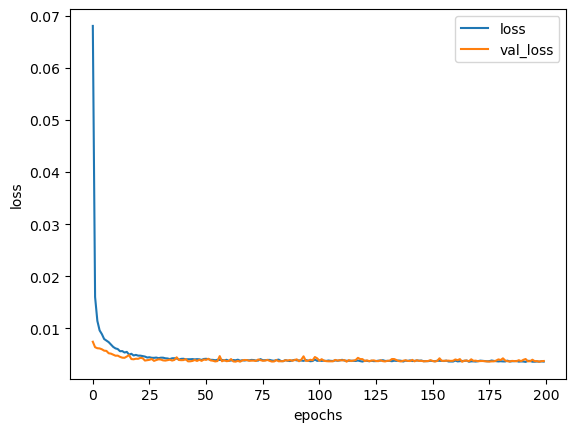

In [18]:
plt.plot(model1.history.history['loss'],label='loss')
plt.plot(model1.history.history['val_loss'],label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

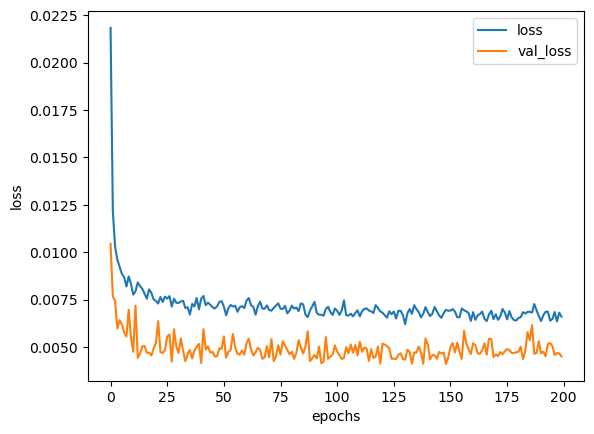

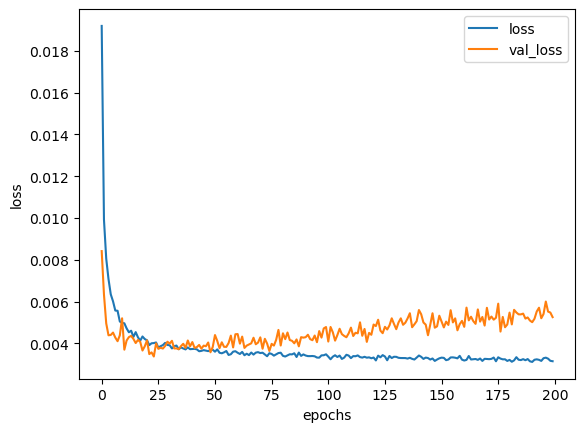

In [19]:
from sklearn.metrics import r2_score

predicted_result = model1.predict(X_test)


r2=r2_score(y_test,predicted_result)

print('r2 score: ',r2)

42/42 [==============================] - 0s 7ms/step
r2 score:  0.8436387089867456


In [20]:
print('actual:',y_test[:10].T)
print('predicted:',predicted_result[:10].T)

actual: [[0.45369285 0.07971864 0.02930832 0.45720985 0.22508792 0.12543962
  0.34935522 0.02579132 0.05392732 0.22391559]]
predicted: [[0.31126451 0.10680863 0.04138908 0.31573516 0.21030438 0.12928692
  0.147385   0.04844579 0.0450682  0.213375  ]]


In [21]:
print('actual inverse scaled:',scaler_target.inverse_transform(y_test[:10]).T)
print('predicted inverse scaled:',scaler_target.inverse_transform(predicted_result[:10]).T)

actual inverse scaled: [[38.8  6.9  2.6 39.1 19.3 10.8 29.9  2.3  4.7 19.2]]
predicted inverse scaled: [[26.650864   9.210776   3.6304884 27.03221   18.038963  11.128174
  12.671941   4.232426   3.9443178 18.300888 ]]
